In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Reading the data
df= pd.read_csv('../Files/access.csv')

In [9]:
# using GOOGLE routes API Compute route polyline between two points using coordinates
# https://developers.google.com/maps/documentation/utilities/polylinealgorithm

# python code for polyline between two coordinates
import polyline
import requests
import json

def get_route_polyline(start, end):
    url = f'https://maps.googleapis.com/maps/api/directions/json?origin={start}&destination={end}& key=ENTERAPIKEY'
    response = requests.get(url)
    data = response.json()
    polyline_points = data['routes'][0]['overview_polyline']['points']
    return polyline.decode(polyline_points)

# Example
start = '12.92595573,77.58347683'
end = '12.929312265009031,77.5802958957799'
route = get_route_polyline(start, end)
print(route)

IndexError: list index out of range

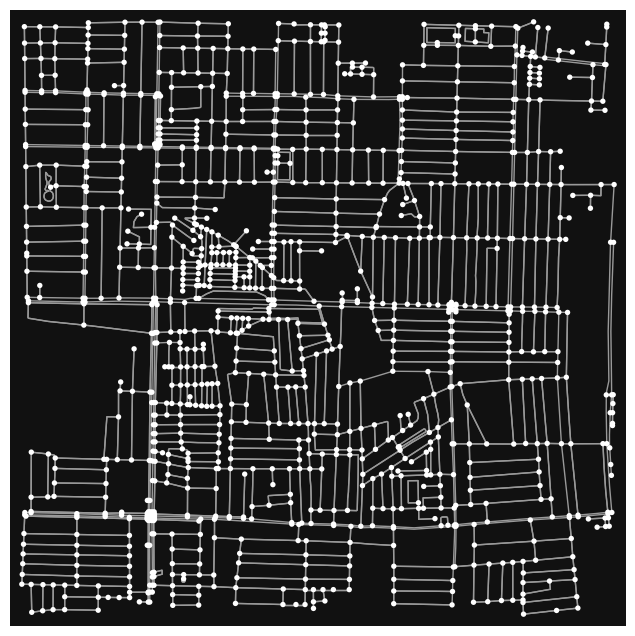

In [22]:
import osmnx as ox
import networkx as nx

# Define the start and end points


start = (12.91654651,77.59089937)
end = (12.929312265009031, 77.5802958957799)

# Create a graph from the street network
G = ox.graph_from_point(start, dist=1000, network_type='all')

# Get the nearest network nodes to the two points
orig = ox.distance.nearest_nodes(G, start[0], start[1])
dest = ox.distance.nearest_nodes(G, end[0], end[1])

# Find the shortest path between the two nodes
route = nx.shortest_path(G, orig, dest, weight='length')

# Plot the street network
fig, ax = ox.plot_graph(G)

# Plot the shortest path
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, ax=ax, route_color='r')

# Plot the origin and destination points
ax.scatter(start[1], start[0], c='g', s=100, label='Start')
ax.scatter(end[1], end[0], c='b', s=100, label='End')
ax.legend()


In [13]:
# Plotting the route using plotly
def plot_route_plotly(route):
    lats, lons = zip(*route)
    fig = px.line_mapbox(lat=lats, lon=lons, zoom=3)
    fig.update_layout(mapbox_style="open-street-map")
    fig.show()

plot_route_plotly(route)

TypeError: 'int' object is not iterable

In [14]:
# Plotting the route
def plot_route(route):
    lats, lons = zip(*route)
    plt.plot(lons, lats)
    plt.show()

plot_route(route)

TypeError: 'int' object is not iterable

In [ ]:
# Plotting the route using kepler.gl
from keplergl import KeplerGl
def plot_route_keplergl(route):
    map_1 = KeplerGl(height=600)
    map_1.add_line_layer(data={'route': route})
    map_1
plot_route_keplergl(route)

In [ ]:
# Plotting the route using ipyleaflet
from ipyleaflet import Map, Polyline
def plot_route_ipyleaflet(route):
    m = Map(center=route[0], zoom=10)
    p = Polyline(locations=route, color="blue", fill=False)
    m.add_layer(p)
    m
plot_route_ipyleaflet(route)

In [ ]:
# Plotting the route using mplleaflet
import mplleaflet
def plot_route_mplleaflet(route):
    lats, lons = zip(*route)
    plt.plot(lons, lats)
    mplleaflet.display()
plot_route_mplleaflet(route)

In [ ]:
# Plotting the route using contextily
import contextily as ctx
def plot_route_contextily(route):
    gdf = gpd.GeoDataFrame({'geometry': gpd.GeoSeries(route)})
    ax = gdf.plot()
    ctx.add_basemap(ax)
    plt.show()
plot_route_contextily(route)


In [ ]:
# Plotting the route using folium
import folium
def plot_route_folium(route):
    m = folium.Map(location=route[0], zoom_start=6)
    folium.PolyLine(route).add_to(m)
    m
plot_route_folium(route)

In [ ]:
# Plotting the route using geopandas
import geopandas as gpd
def plot_route_geopandas(route):
    gdf = gpd.GeoDataFrame({'geometry': gpd.GeoSeries(route)})
    gdf.plot()
    plt.show()
plot_route_geopandas(route)